In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download stopwords for text processing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
# For advanced visualization: wordcloud (if installed)
try:
    from wordcloud import WordCloud
except ImportError:
    print("WordCloud module not found. Please install it using '!pip install wordcloud'.")


# Load dataset 2 (assumed to be named 'dataset2.csv')
dataset2 = pd.read_csv('.\\Twitter_Data\\Twitter_Data.csv')

# Display a sample of the data
print("Twitter Data Sample:")
print(dataset2.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Twitter Data Sample:
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [2]:
# - Drop rows with missing values in critical columns ('clean_text' or 'category')
dataset2 = dataset2.dropna(subset=['clean_text', 'category'])

# - Ensure text is string type and convert to lowercase
dataset2['clean_text'] = dataset2['clean_text'].astype(str).str.lower()

# Verify that there are no missing values left
print("Missing values in dataset2:")
print(dataset2.isnull().sum())

Missing values in dataset2:
clean_text    0
category      0
dtype: int64


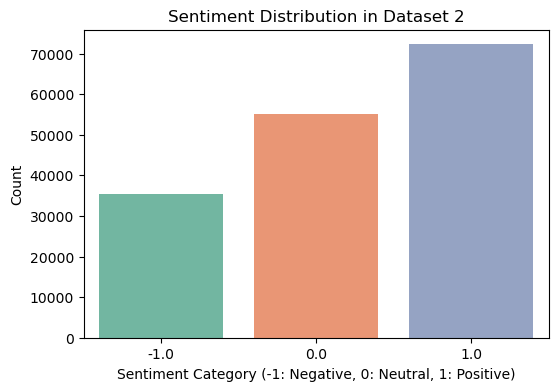

In [3]:
# Visualize the distribution of sentiment categories
plt.figure(figsize=(6, 4))
sns.countplot(x='category', data=dataset2, palette='Set2')
plt.title("Sentiment Distribution in Dataset 2")
plt.xlabel("Sentiment Category (-1: Negative, 0: Neutral, 1: Positive)")
plt.ylabel("Count")
plt.show()

In [4]:
#  3. Feature Engineering

# Initialize a TF-IDF Vectorizer with English stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Prepare features and labels
X = dataset2['clean_text']
y = dataset2['category']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the text data into TF-IDF features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [5]:
# 4. Model Building & Evaluation
# -------------------------------

# Initialize and train a Multinomial Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict sentiments on the test set
y_pred = nb_model.predict(X_test_tfidf)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.86      0.43      0.57      7152
         0.0       0.79      0.64      0.70     11067
         1.0       0.64      0.89      0.75     14375

    accuracy                           0.70     32594
   macro avg       0.76      0.65      0.67     32594
weighted avg       0.74      0.70      0.69     32594



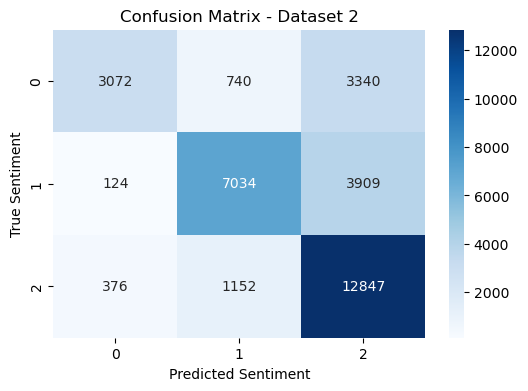

In [6]:
# Plot confusion matrix to visualize prediction errors
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Dataset 2")
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.show()

In [7]:
# Print overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7042093636865681


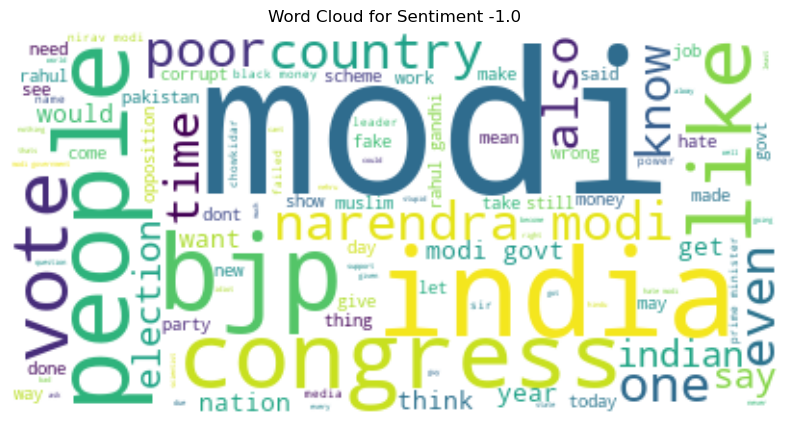

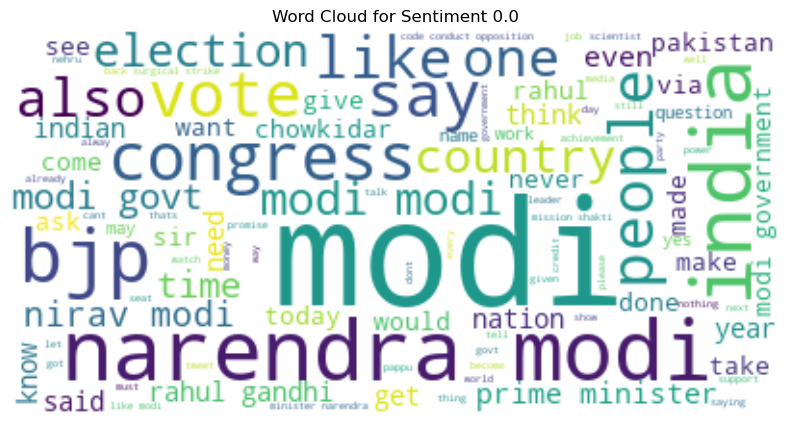

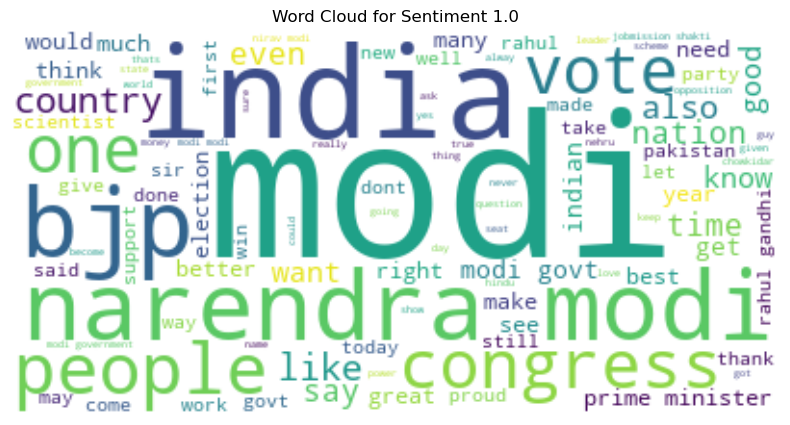

In [8]:
# 5. Data Visualization: Word Clouds
%matplotlib inline
# Define a function to generate and display word clouds for each sentiment category
def plot_wordcloud(data, title):
    text = " ".join(data)
    wordcloud = WordCloud(stopwords=stopwords.words('english'),
                          background_color='white',
                          max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Generate word clouds for each sentiment category
for sentiment in sorted(dataset2['category'].unique()):
    subset = dataset2[dataset2['category'] == sentiment]['clean_text']
    plot_wordcloud(subset, f"Word Cloud for Sentiment {sentiment}")

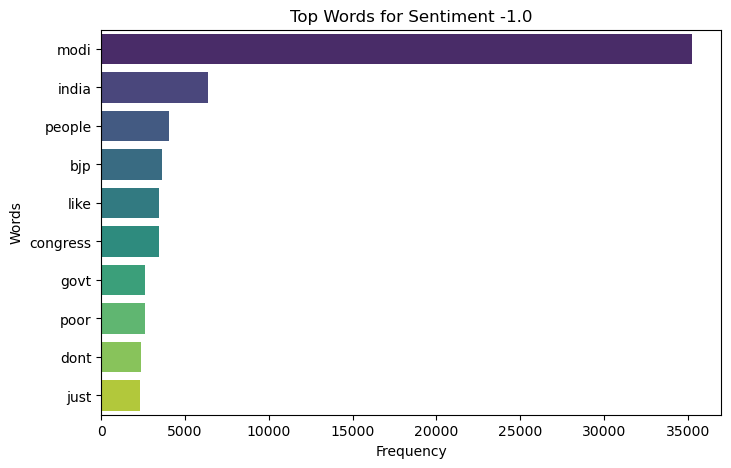

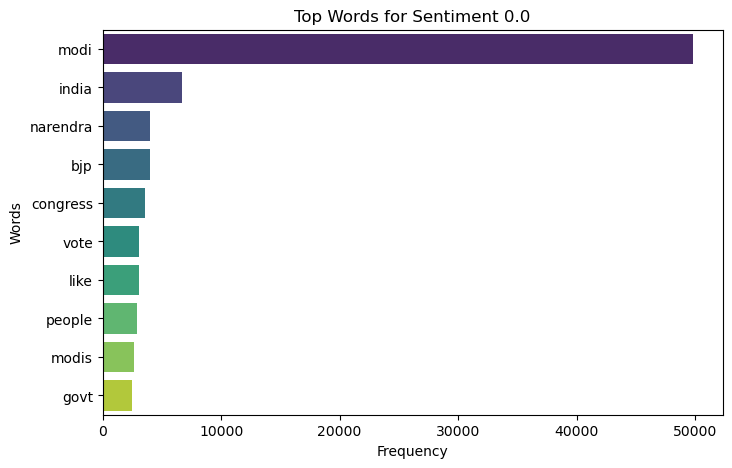

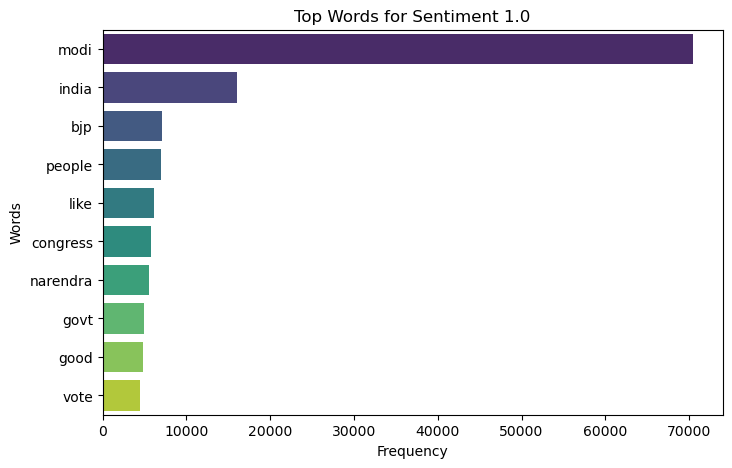

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_words(text_data, title, n=10):
    # Initialize a CountVectorizer with stop words removal
    cv = CountVectorizer(stop_words='english')
    word_count = cv.fit_transform(text_data)
    sum_words = word_count.sum(axis=0)
    # Get word frequencies
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    # Sort and take the top n words
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
    
    words = [word for word, count in words_freq]
    counts = [count for word, count in words_freq]
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x=counts, y=words, palette="viridis")
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

# Plot top words for each sentiment category
for sentiment in sorted(dataset2['category'].unique()):
    subset = dataset2[dataset2['category'] == sentiment]['clean_text']
    plot_top_words(subset, f"Top Words for Sentiment {sentiment}", n=10)


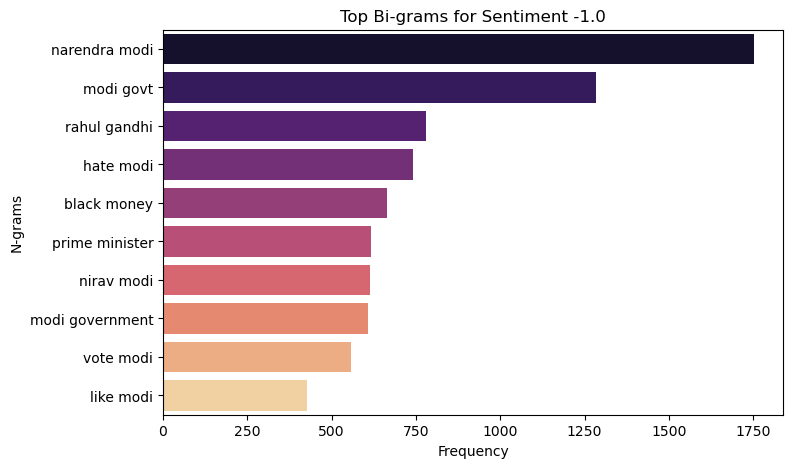

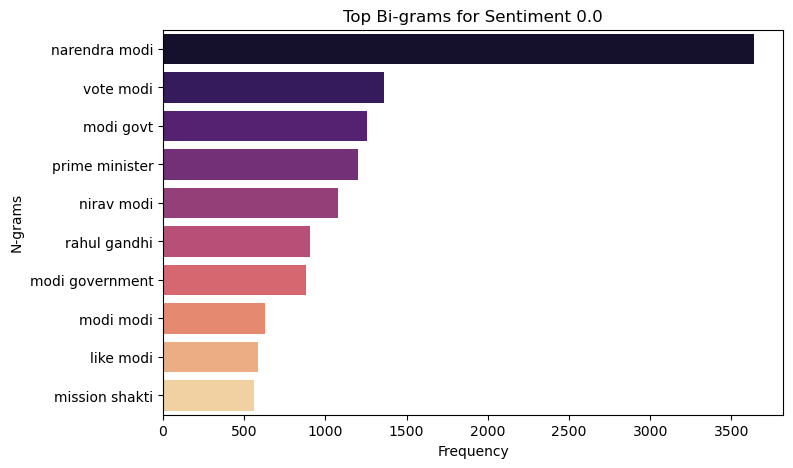

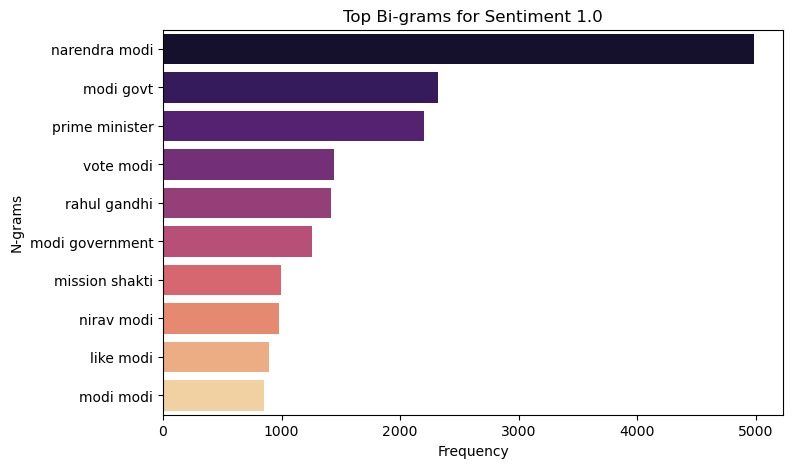

In [10]:
def plot_top_ngrams(text_data, title, ngram_range=(2,2), n=10):
    cv = CountVectorizer(stop_words='english', ngram_range=ngram_range)
    ngram_count = cv.fit_transform(text_data)
    sum_ngrams = ngram_count.sum(axis=0)
    ngrams_freq = [(ngram, sum_ngrams[0, idx]) for ngram, idx in cv.vocabulary_.items()]
    ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:n]
    
    ngrams = [ngram for ngram, count in ngrams_freq]
    counts = [count for ngram, count in ngrams_freq]
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x=counts, y=ngrams, palette="magma")
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("N-grams")
    plt.show()

# Plot top bi-grams for each sentiment category
for sentiment in sorted(dataset2['category'].unique()):
    subset = dataset2[dataset2['category'] == sentiment]['clean_text']
    plot_top_ngrams(subset, f"Top Bi-grams for Sentiment {sentiment}", ngram_range=(2,2), n=10)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the clean_text column
X_tfidf = tfidf_vectorizer.fit_transform(dataset2['clean_text'])

# Convert sparse matrix to dense
X_dense = X_tfidf.toarray()

# Initialize PCA
pca = PCA(n_components=2)

# Fit and transform the TF-IDF features
X_pca = pca.fit_transform(X_dense)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Category'] = df['category']

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2', hue='Category', palette='viridis', s=100, alpha=0.7)
plt.title('PCA of TF-IDF Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Category')
plt.grid(True)
plt.show()